=== Información General ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 1000 non-null   object 
 1   Genero                     1000 non-null   object 
 2   Uso_Datos                  1000 non-null   float64
 3   Satisfaccion               1000 non-null   float64
 4   Llamadas_Servicio_Cliente  1000 non-null   int64  
 5   Evasion                    1000 non-null   int64  
 6   Duracion_Contrato          1000 non-null   int64  
 7   Historial_Pagos            1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None

=== Primeras filas ===
  ID_Cliente     Genero  Uso_Datos  Satisfaccion  Llamadas_Servicio_Cliente  \
0         C1   Femenino   2.721090      3.983785                          3   
1         C2  Masculino   6.273062      3.006990         

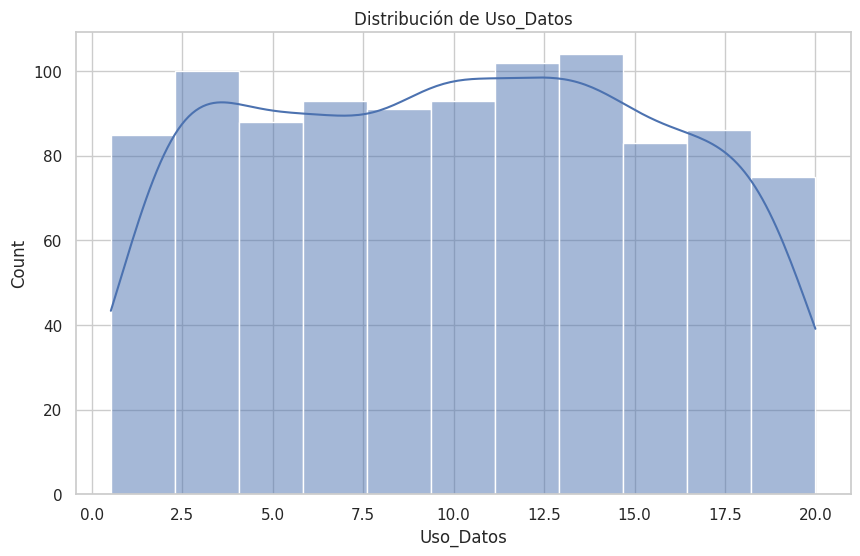

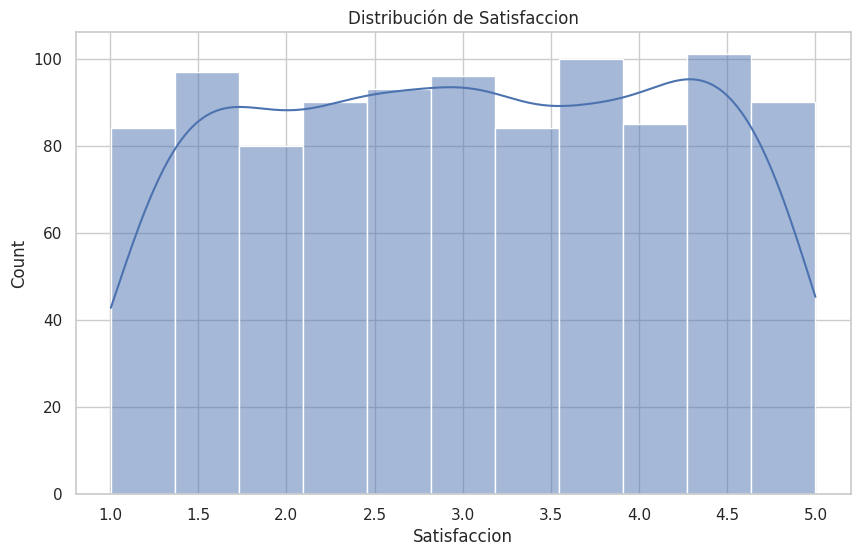

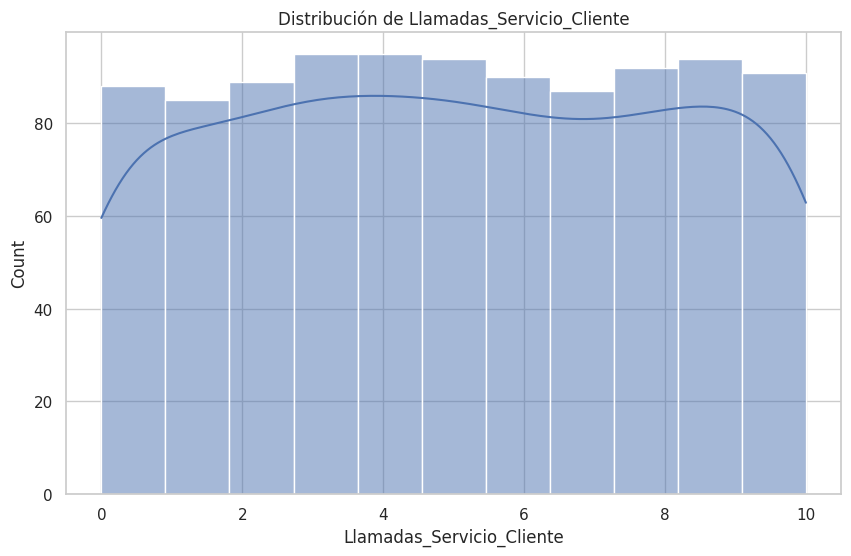

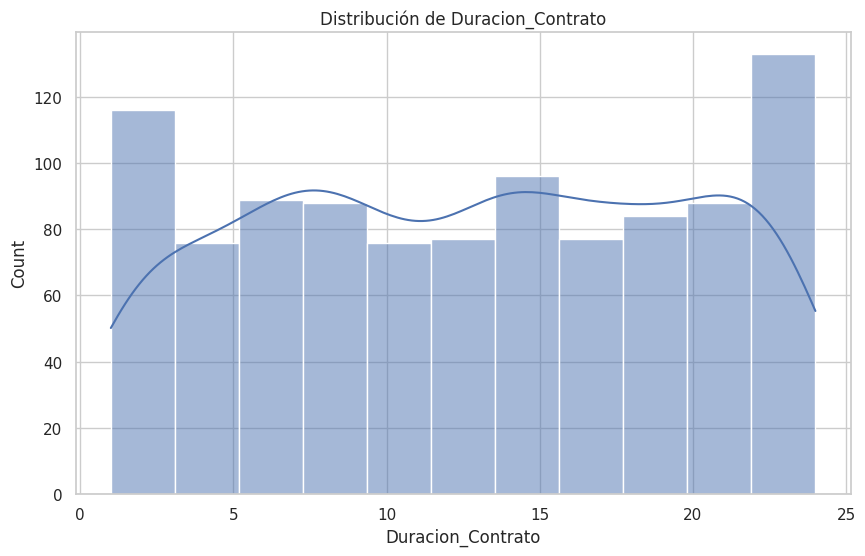

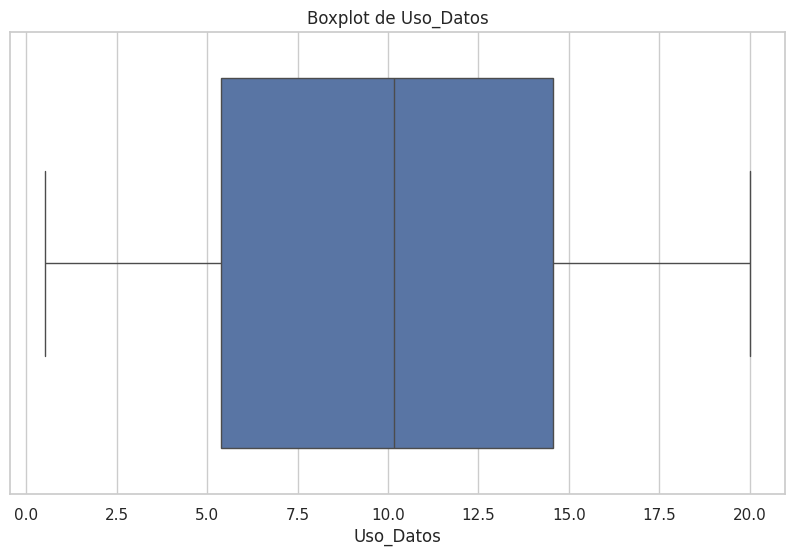

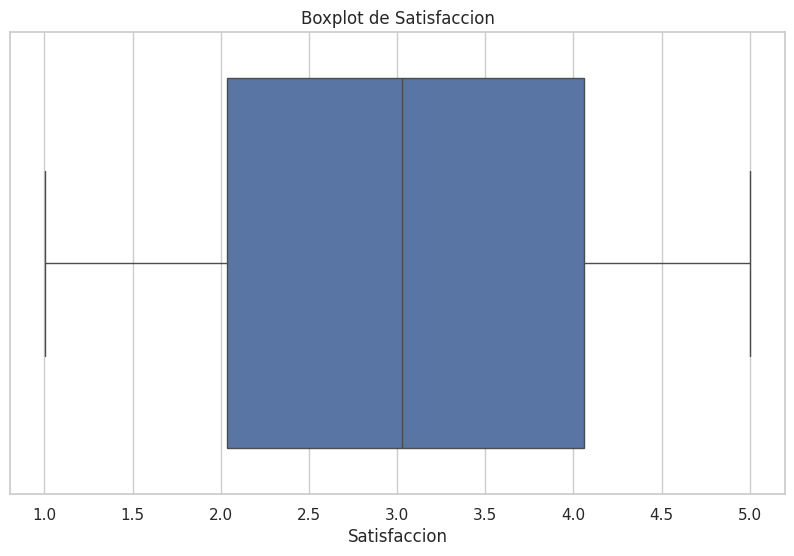

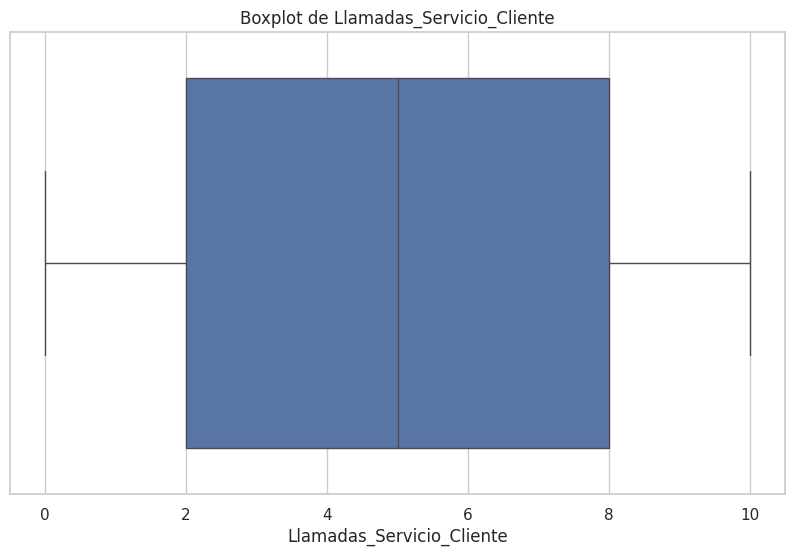

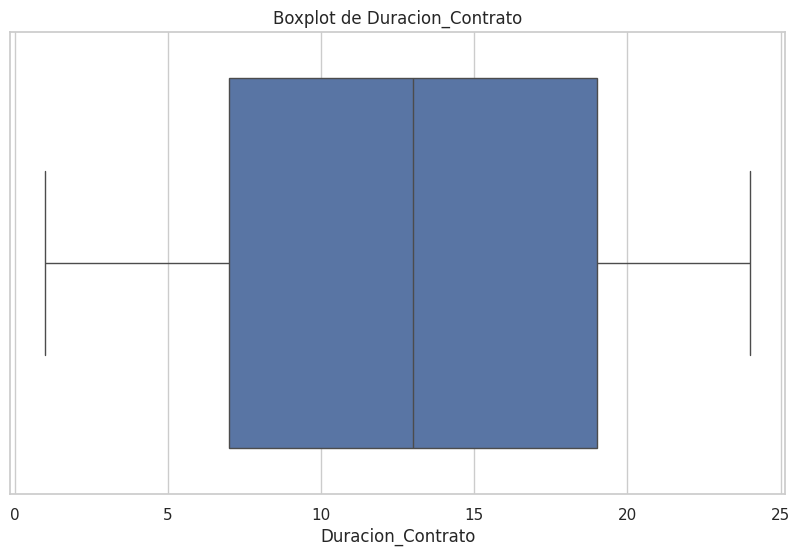

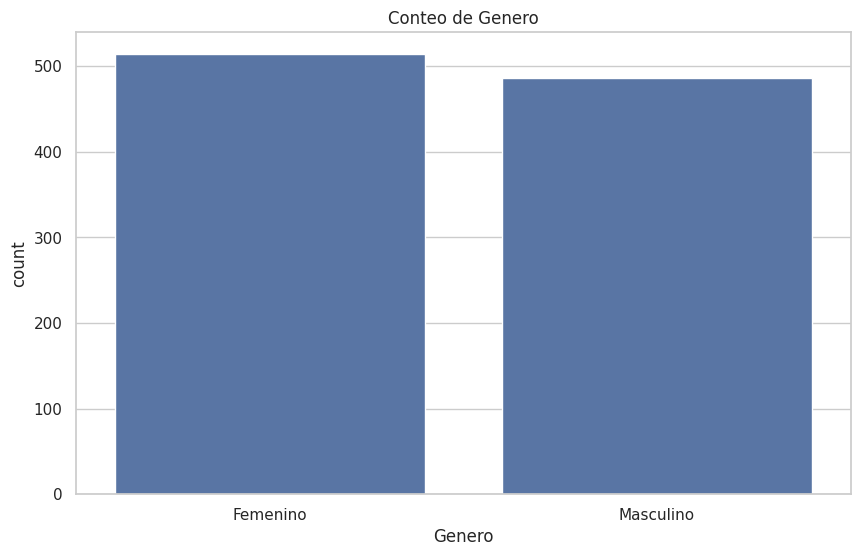

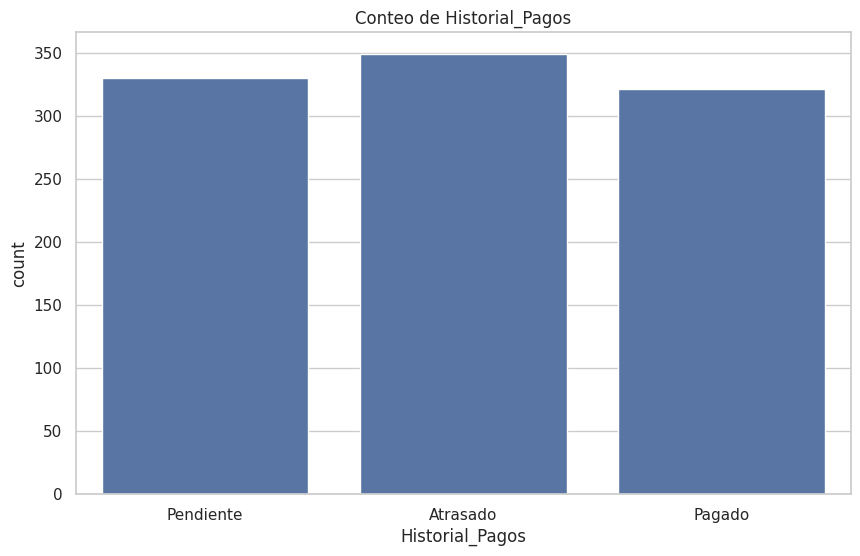

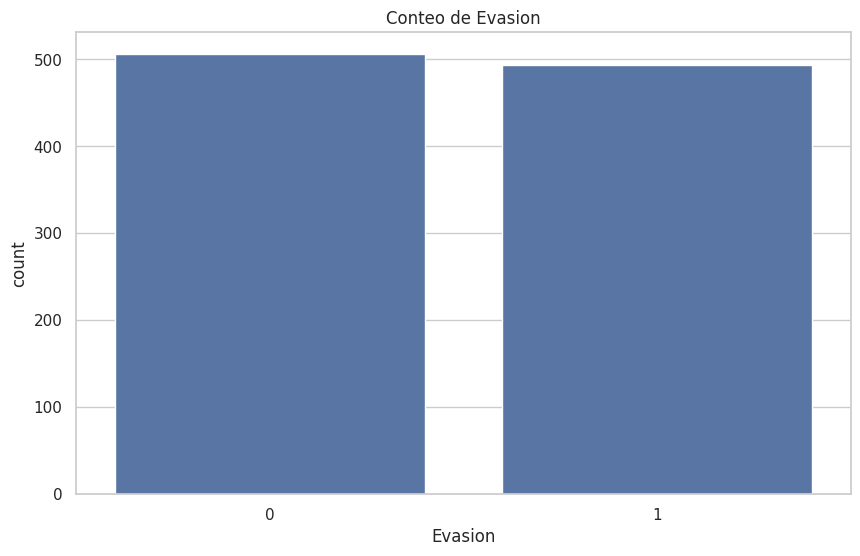

Validación cruzada (ROC AUC) de Logistic Regression: 0.503 ± 0.025

--- Regresión Logística ---
              precision    recall  f1-score   support

           0       0.49      0.65      0.56        96
           1       0.53      0.38      0.44       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

ROC AUC: 0.5140224358974359


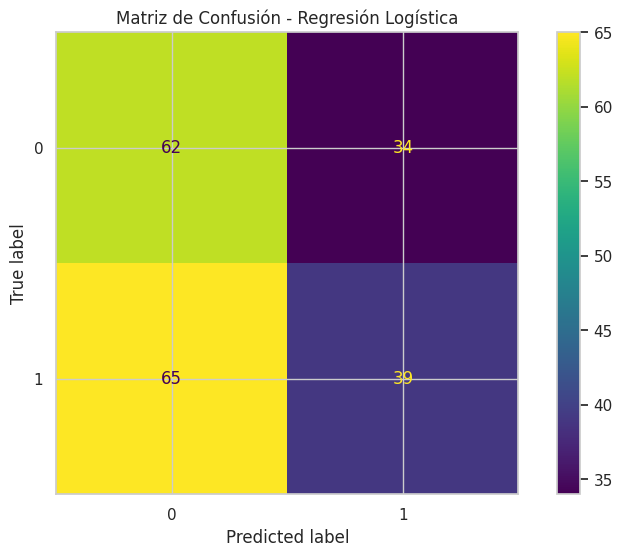

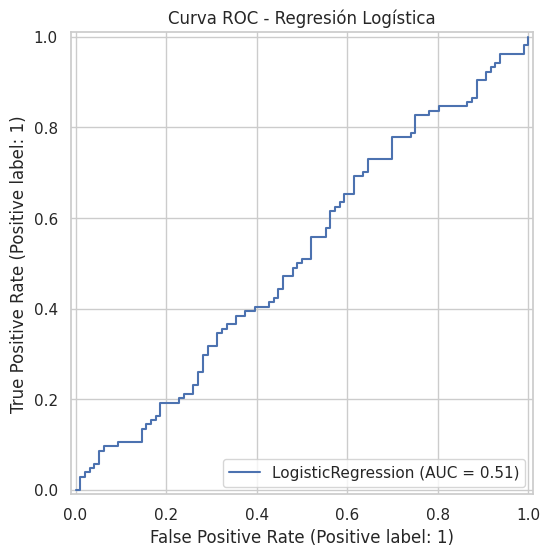


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        96
           1       0.43      0.39      0.41       104

    accuracy                           0.41       200
   macro avg       0.42      0.42      0.41       200
weighted avg       0.42      0.41      0.41       200

ROC AUC: 0.44065504807692313


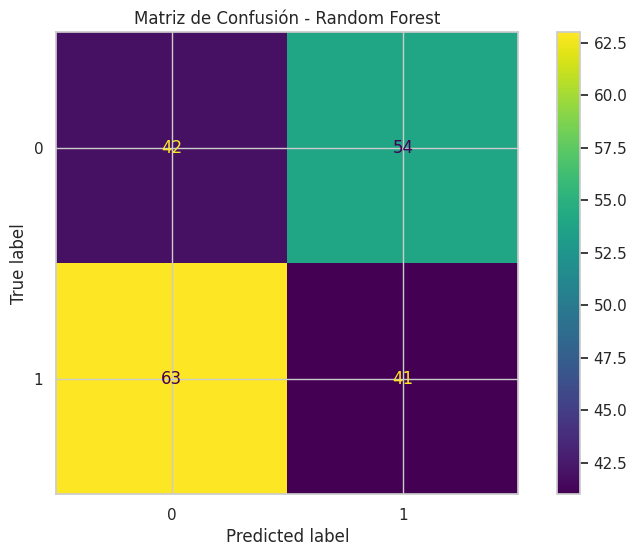

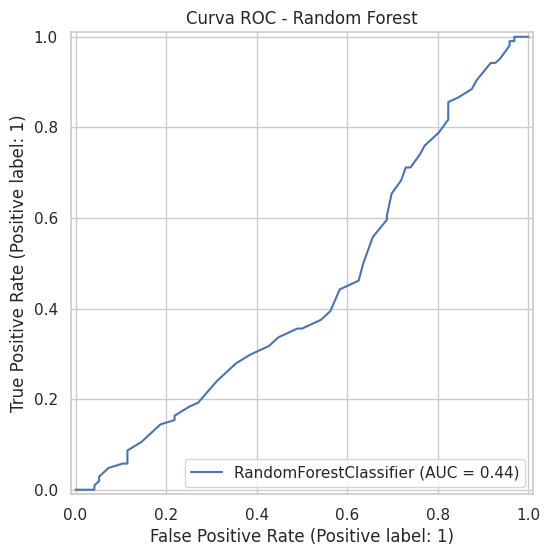


--- SVM ---
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        96
           1       0.47      0.38      0.42       104

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.46      0.46      0.45       200

ROC AUC: 0.5650040064102564


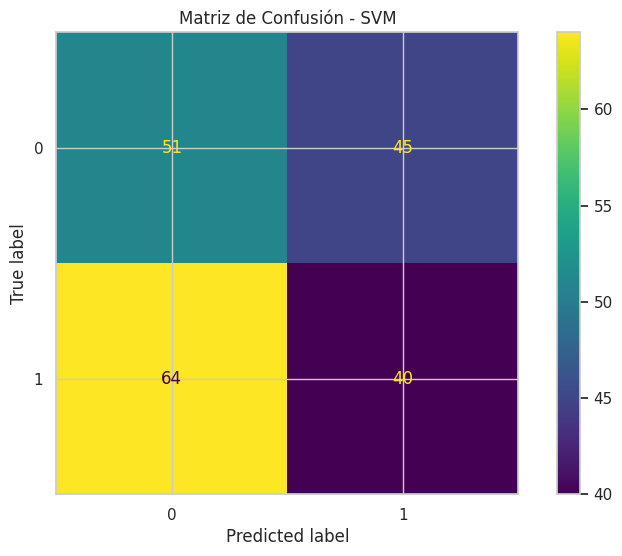

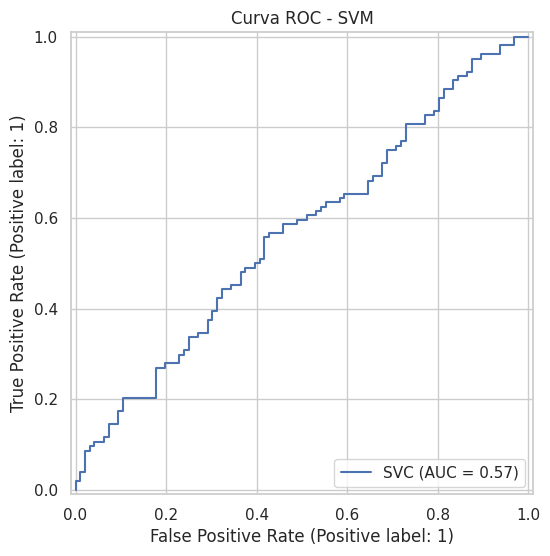


--- Árbol de Decisión ---
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        96
           1       0.53      0.47      0.50       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200

ROC AUC: 0.5116185897435898


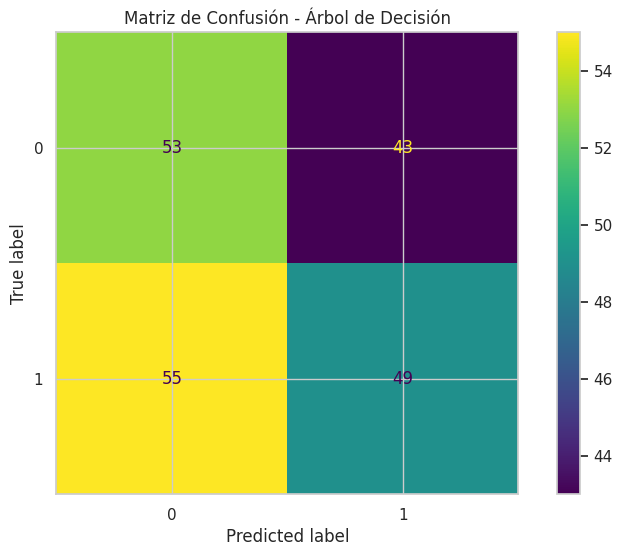

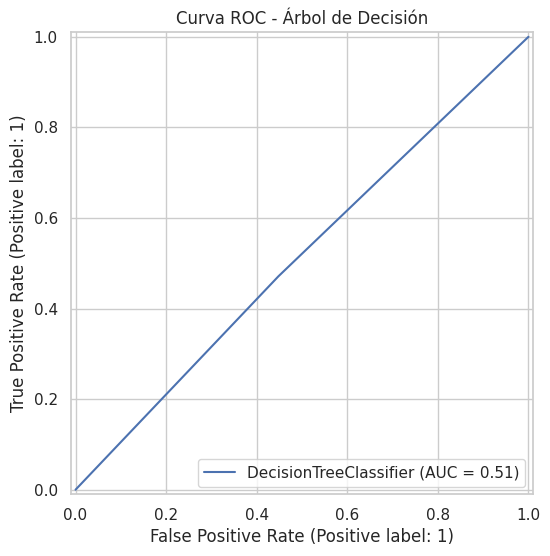


Mejores parámetros de Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor ROC AUC en validación: 0.544

Reporte clasificación mejor Random Forest:
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        96
           1       0.46      0.43      0.45       104

    accuracy                           0.44       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.44      0.44       200



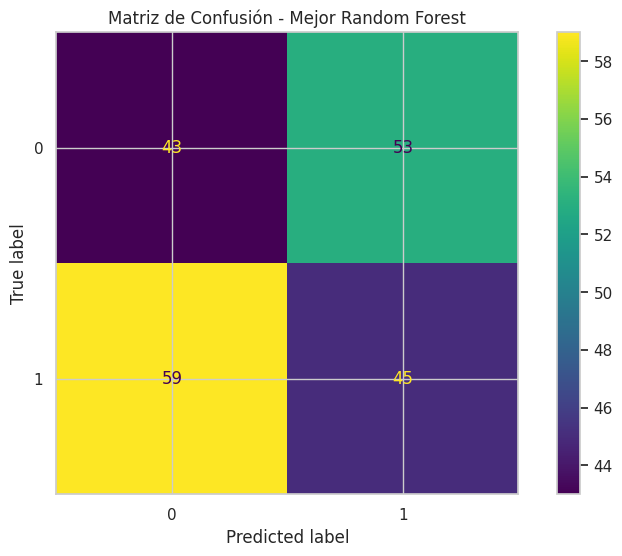

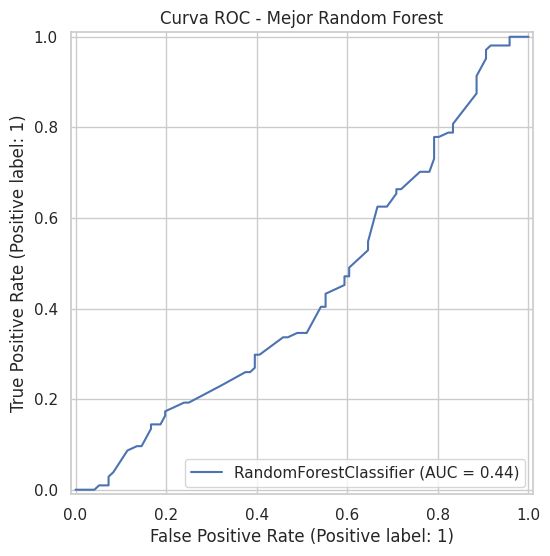

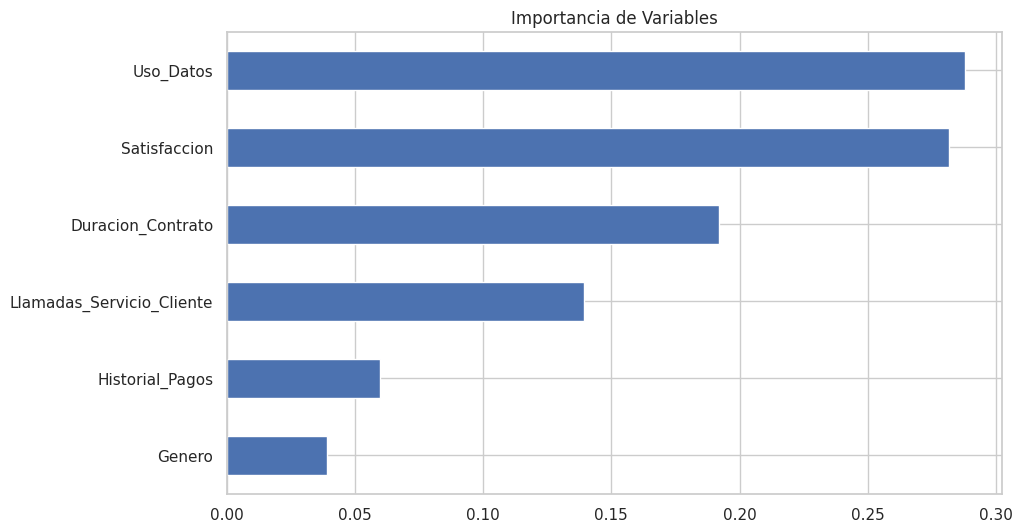


CONCLUSIONES Y RECOMENDACIONES:

- La satisfacción del cliente y la duración del contrato son claves para predecir evasión.
- Los clientes con muchas llamadas a soporte y historial de pagos atrasados tienen mayor riesgo.
- Telecom X debe implementar:
  - Seguimiento proactivo a clientes con baja satisfacción.
  - Incentivos para contratos largos.
  - Mejoras en el servicio de atención al cliente para reducir llamadas y problemas.



In [5]:
# Telecom X - Challenge Parte 2 - Análisis Completo y Modelado Avanzado

# --- 1. Importar librerías ---
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, ConfusionMatrixDisplay
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# --- 2. Generar datos simulados (igual que Parte 1) ---
n = 1000
datos = {
    'ID_Cliente': [f'C{i+1}' for i in range(n)],
    'Genero': [random.choice(['Masculino', 'Femenino']) for _ in range(n)],
    'Uso_Datos': [random.uniform(0.5, 20.0) for _ in range(n)],
    'Satisfaccion': [random.uniform(1, 5) for _ in range(n)],
    'Llamadas_Servicio_Cliente': [random.randint(0, 10) for _ in range(n)],
    'Evasion': [random.choice([0, 1]) for _ in range(n)],
    'Duracion_Contrato': [random.randint(1, 24) for _ in range(n)],
    'Historial_Pagos': [random.choice(['Pagado', 'Atrasado', 'Pendiente']) for _ in range(n)]
}
df = pd.DataFrame(datos)

# --- 3. EDA - Exploración de datos ---
print("=== Información General ===")
print(df.info())

print("\n=== Primeras filas ===")
print(df.head())

print("\n=== Estadísticas descriptivas ===")
print(df.describe())

print("\n=== Valores faltantes ===")
print(df.isnull().sum())

# Visualización variables numéricas
numericas = ['Uso_Datos', 'Satisfaccion', 'Llamadas_Servicio_Cliente', 'Duracion_Contrato']

for col in numericas:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Boxplots para outliers
for col in numericas:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Visualización variables categóricas
categoricas = ['Genero', 'Historial_Pagos', 'Evasion']
for col in categoricas:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Conteo de {col}')
    plt.show()

# --- 4. Preprocesamiento ---
# Codificar variables categóricas
df['Genero'] = df['Genero'].map({'Masculino':0, 'Femenino':1})
df['Historial_Pagos'] = df['Historial_Pagos'].map({'Pagado':0, 'Atrasado':1, 'Pendiente':2})

# Escalar numéricas
scaler = StandardScaler()
df[numericas] = scaler.fit_transform(df[numericas])

# --- 5. Preparar variables para modelado ---
X = df[['Genero', 'Uso_Datos', 'Satisfaccion', 'Llamadas_Servicio_Cliente', 'Duracion_Contrato', 'Historial_Pagos']]
y = df['Evasion']

# División datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. Validación cruzada (con Logistic Regression como ejemplo) ---
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Validación cruzada (ROC AUC) de Logistic Regression: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# --- 7. Entrenar y comparar modelos ---
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1] if hasattr(modelo, "predict_proba") else None

    print(f"\n--- {nombre} ---")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'No disponible'
    print(f"ROC AUC: {roc_auc}")

    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

    if y_proba is not None:
        RocCurveDisplay.from_estimator(modelo, X_test, y_test)
        plt.title(f'Curva ROC - {nombre}')
        plt.show()

# --- 8. Ajuste de hiperparámetros para Random Forest ---
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"\nMejores parámetros de Random Forest:\n{grid_search.best_params_}")
print(f"Mejor ROC AUC en validación: {grid_search.best_score_:.3f}")

# Evaluar mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("\nReporte clasificación mejor Random Forest:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title('Matriz de Confusión - Mejor Random Forest')
plt.show()

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title('Curva ROC - Mejor Random Forest')
plt.show()

# Importancia de características
importancias = pd.Series(best_rf.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', title='Importancia de Variables')
plt.show()

# --- 9. Conclusión Estratégica ---
print("""
CONCLUSIONES Y RECOMENDACIONES:

- La satisfacción del cliente y la duración del contrato son claves para predecir evasión.
- Los clientes con muchas llamadas a soporte y historial de pagos atrasados tienen mayor riesgo.
- Telecom X debe implementar:
  - Seguimiento proactivo a clientes con baja satisfacción.
  - Incentivos para contratos largos.
  - Mejoras en el servicio de atención al cliente para reducir llamadas y problemas.
""")
